#  Introduction to Scikit-learn


Scikit-learn (often imported as sklearn) is a powerful and easy-to-use Python library for machine learning.

It helps you:
- Classify data (e.g., healthy vs. diseased cells),
- Predict trends (e.g., enzyme activity over time),
- Cluster groups (e.g., different protein expression patterns),
- And much more.

In biosciences, we often collect large sets of experimental data.
Scikit-learn makes it easy to build models that help us understand patterns in that data.

Example: Is there a pattern in gene expression between two groups of samples? Can we predict an unknown sample's behavior based on known measurements?

## Learning Objectives


By the end of this chapter, you will be able to:
- Understand what machine learning is and why it’s useful in biosciences.
- Use Scikit-learn to train simple classification and regression models.
- Evaluate model performance using accuracy and error scores.
- Apply models to real-world biological data like enzyme rates or gene expression.

# Fundamentals and Popular Functions


Let’s cover the most common scikit-learn steps for beginners:

1. Prepare your data (features and labels).
2. Split it into training and test sets.
3. Choose a model (e.g., regression, classification).
4. Train (fit) the model using your training data.
5. Predict using the test data.
6. Evaluate how well your model did.

Let’s go through each one.


## Importing Libraries

In [2]:

# Importing Required Libraries

# Import NumPy for numerical operations
import numpy as np

# Import pandas for handling data tables
import pandas as pd

# Import matplotlib for plotting graphs
import matplotlib.pyplot as plt

# Import scikit-learn tools
from sklearn.model_selection import train_test_split  # for splitting data
from sklearn.linear_model import LinearRegression      # for regression tasks
from sklearn.neighbors import KNeighborsClassifier     # for classification
from sklearn.metrics import mean_squared_error, accuracy_score  # for evaluating models

# Set plots to show inside the notebook
%matplotlib inline


## Step 1: Prepare your data

Example: Imagine we measured substrate concentration and enzyme activity
Features = substrate concentration, Labels = enzyme activity (target)




In [3]:
X = np.array([[0.1], [0.2], [0.3], [0.4], [0.5]])  # substrate concentration (mM)
y = np.array([0.05, 0.09, 0.14, 0.20, 0.27])       # enzyme activity (μmol/min)

## Step 2: Split into training and test sets
We train on some data and test on the rest to see how well our model performs



In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 80% of the data is for training, 20% for testing

In [5]:
# Step 3: Choose and create a model
model = LinearRegression()  # We're doing a regression task

# Step 4: Train the model
model.fit(X_train, y_train)  # This tells the model to learn the relationship between X and y


LinearRegression()

In [6]:
# Step 5: Predict on test data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 5.102040816326534e-05


## Data Analysis Example 1: Predicting Enzyme Activity


In an enzyme kinetics experiment, you measure substrate concentrations and the resulting enzyme activity.

We want to train a model that can predict enzyme activity from substrate concentration.
This could help automate future experiments or fill in missing data.



Test Set: [0.4 0.2]
Predicted Activity: [0.19368715 0.10363128]
True Activity: [0.18 0.09]
MSE: 0.00018657501326425408


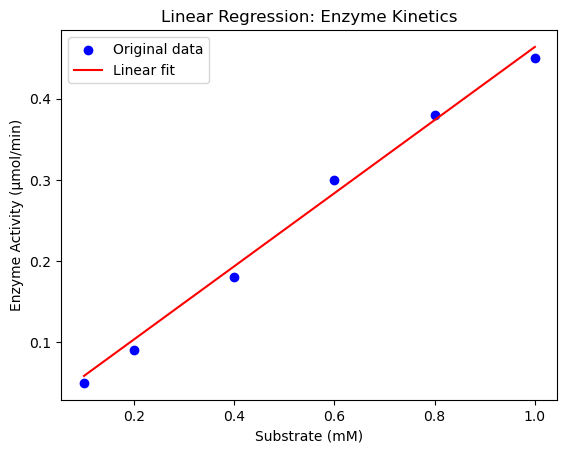

In [7]:
# Simulated experimental data
substrate = np.array([[0.1], [0.2], [0.4], [0.6], [0.8], [1.0]])  # in mM
activity = np.array([0.05, 0.09, 0.18, 0.30, 0.38, 0.45])         # μmol/min

# Split the data
X_train, X_test, y_train, y_test = train_test_split(substrate, activity, test_size=0.33, random_state=1)

# Create and train model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict
predictions = reg_model.predict(X_test)

# Evaluate
print("Test Set:", X_test.flatten())
print("Predicted Activity:", predictions)
print("True Activity:", y_test)
print("MSE:", mean_squared_error(y_test, predictions))

# Plotting the fit
plt.scatter(substrate, activity, color='blue', label='Original data')
plt.plot(substrate, reg_model.predict(substrate), color='red', label='Linear fit')
plt.xlabel("Substrate (mM)")
plt.ylabel("Enzyme Activity (μmol/min)")
plt.title("Linear Regression: Enzyme Kinetics")
plt.legend()
plt.show()


## Biochemistry/Biosciences Data Analysis Example 2: Classifying DNA Binding Proteins


You measured the molecular weight and isoelectric point (pI) of proteins and labeled them:
- 0 = non-DNA-binding
- 1 = DNA-binding

Let’s train a classifier to predict whether a new protein binds DNA based on these features.



In [8]:
# Simulated data: [molecular weight (kDa), pI]
X = np.array([
    [40, 6.5],
    [55, 9.2],
    [70, 5.0],
    [25, 8.3],
    [90, 4.7],
    [60, 9.5],
    [35, 6.0],
    [85, 5.2]
])

# Labels: 1 = DNA-binding, 0 = not
y = np.array([0, 1, 0, 1, 0, 1, 0, 0])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train classifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Predicted Labels:", y_pred)
print("True Labels     :", y_test)
print("Accuracy        :", accuracy_score(y_test, y_pred))


Predicted Labels: [1 1]
True Labels     : [0 0]
Accuracy        : 0.0


## Summary of What You’ve Learned


- Scikit-learn is a powerful tool for machine learning in biosciences.
- You learned how to:
    - Load and split your data into training and testing sets
    - Train models like Linear Regression and K-Nearest Neighbors
    - Predict and evaluate performance using accuracy and mean squared error
- You saw real bioscience examples:
    - Predicting enzyme activity from substrate concentration
    - Classifying proteins as DNA-binding or not

These tools can help you automate lab analysis, discover patterns in complex data, and build predictive models for research.

